# Линейная регрессия и стохастический градиентный спуск

Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
У градиентного спуска, описанного выше, есть один недостаток. На больших выборках вычисление градиента по всем имеющимся данным на каждом шаге может быть вычислительно сложно.
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности).
На практике лучше находить вектор весов $w$ решением матричного уравнения
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("advertising.csv")
df


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [13]:
df.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [15]:
X = df[["TV", "Radio", "Newspaper"]].to_numpy()
y = df[["Sales"]].to_numpy()
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [16]:
def scale(col: np.ndarray) -> np.ndarray:
    return (col - col.mean()) / col.std()

for i in range(X.shape[1]):
    X[:, i] = scale(X[:, i])
X
    

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [17]:
ones_column = np.ones(200)
X = np.hstack((ones_column.reshape(-1, 1), X))
X

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [22]:
def mserror(y: pd.Series, y_pred: pd.Series) -> float:
    if len(y) != len(y_pred):
        raise ValueError("Length of y and y_pred must be equal")
    
    n = len(y)
    
    return np.sum((y - y_pred) ** 2) / n
    

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке?*
*

In [37]:
med = np.full((200, ), np.median(y))
mserror(pd.Series(y.flatten()), pd.Series(med))


np.float64(28.34575)

MSE = 28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

$$X^TXw = X^Ty$$

In [39]:
def normal_equation(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_t = X.transpose()
    X_t_X = X_t @ X
    return np.linalg.inv(X_t_X) @ X_t @ y


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper).**

In [52]:
omega_1 = normal_equation(X, y)
X_1 = np.array([1, 0, 0, 0]).reshape(1, -1)
y_pred_1 = X_1 @ omega_1
y_pred_1.item()


14.0225

y_pred_1 = 14.0225

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [54]:
def linear_prediction(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    return X @ w


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?**

In [67]:
mse_norm_lin = mserror(pd.Series(y.flatten()), pd.Series(linear_prediction(X, omega_1).flatten()))
mse_norm_lin

np.float64(2.784126314510936)

mse_norm_lin = 2.784126314510936 

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов.**

$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$

In [68]:
def stochastic_gradient_step(X: np.ndarray, y: np.ndarray, w: np.ndarray, train_ind: int, eta: float) -> np.ndarray:
    l = len(y)
    
    y_k = y[train_ind]
    X_k = X[train_ind]
    y_k_pred = X_k @ w
    koef = 2 * eta / l
    
    return w + X_k.transpose() * koef * (y_k - y_k_pred).flatten()
    

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [75]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом.
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)

    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        iter_num += 1
        random_ind = np.random.randint(X.shape[0])
        
        prev_w, w = w, stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(prev_w - w)
        errors.append(mserror(y, X @ w))

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [76]:
w, error = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]))
error[-10:-1]

[np.float64(10257.859059599632),
 np.float64(10257.829604317894),
 np.float64(10257.863889087394),
 np.float64(10258.343481564692),
 np.float64(10258.100352620717),
 np.float64(10257.339489678565),
 np.float64(10258.411101009038),
 np.float64(10258.467820115646),
 np.float64(10258.495344546023)]

Text(0, 0.5, 'MSE')

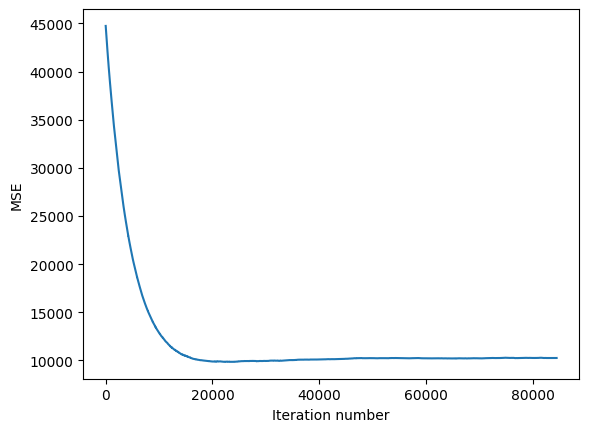

In [77]:
%matplotlib inline
plt.plot(range(len(error)), error)
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [82]:
w

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [81]:
float(error[-1])

10258.495347715667

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска?**

In [84]:
float(mserror(y, X @ w))

10258.495347715667